In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return 2*x**2 - 4*x + 5

# Numerical derivatives

In [3]:
def forward_derivative(f, x, h):
    return (f(x+h) - f(x))/h

In [4]:
def backward_derivative(f, x, h):
    return (f(x) - f(x-h))/h

In [5]:
def central_derivative(f, x, h):
    return (f(x+h) - f(x-h))/(2*h)

In [6]:
xs = np.arange(-5, 5, 0.25)

In [7]:
ys = f(xs)

In [8]:
fd = forward_derivative(f, xs, h=0.01)

In [9]:
((f(xs) - f(xs-0.01))/0.01)[0]

np.float64(-24.01999999999873)

In [10]:
(f(xs+0.01) - f(xs))/0.01

array([-2.398e+01, -2.298e+01, -2.198e+01, -2.098e+01, -1.998e+01,
       -1.898e+01, -1.798e+01, -1.698e+01, -1.598e+01, -1.498e+01,
       -1.398e+01, -1.298e+01, -1.198e+01, -1.098e+01, -9.980e+00,
       -8.980e+00, -7.980e+00, -6.980e+00, -5.980e+00, -4.980e+00,
       -3.980e+00, -2.980e+00, -1.980e+00, -9.800e-01,  2.000e-02,
        1.020e+00,  2.020e+00,  3.020e+00,  4.020e+00,  5.020e+00,
        6.020e+00,  7.020e+00,  8.020e+00,  9.020e+00,  1.002e+01,
        1.102e+01,  1.202e+01,  1.302e+01,  1.402e+01,  1.502e+01])

In [11]:
(f(xs+0.01) - f(xs-0.01))/0.02

array([-24., -23., -22., -21., -20., -19., -18., -17., -16., -15., -14.,
       -13., -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,
        -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,
         9.,  10.,  11.,  12.,  13.,  14.,  15.])

In [12]:
bd = backward_derivative(f, xs, h=0.01)

In [13]:
cd = central_derivative(f, xs, h=0.01)

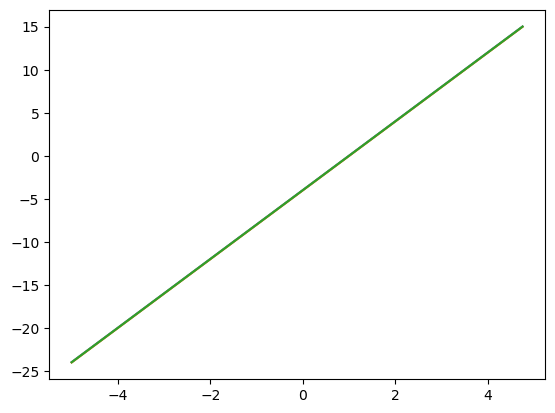

In [14]:
plt.plot(xs, fd)
plt.plot(xs, bd)
plt.plot(xs, cd)
plt.show()

# Partial derivatives

In [15]:
def f(a, b, c):
    return a*b + c

In [16]:
h = 1e-3

In [17]:
# fix input
a = 2
b = -4
c = 6

In [18]:
f(a, b, c)

-2

In [19]:
f(a+h, b, c)

-2.0039999999999996

In [20]:
(f(a+h, b, c) - f(a, b, c))/h

-3.9999999999995595

# Building blocks

In [64]:
class Value:
    def __init__(self, data, _childern = (), _op = '') -> None:
        """
            Value object to store numerical values
            :param data      - numerical value
            :param _childern - all of the childern of the current value node
            :param _op       - operation leading to the current value
        """

        self.data = data
        self._prev = set(_childern)  # used for backprop (childern is previous)
        self._op = _op
        self.grad = 0.0  # records the partial derivative of output wrt this node
        self._backward = lambda : None  # used for backpropagation
    
    def __repr__(self) -> str:
        return f"{self.data}"

    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), '+')

        def _backward():
            self.grad = out.grad
            other.grad = out.grad

        out._backward = _backward

        return out

    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), '*')
    
        def _backward():
            self.grad = out.grad * other.data
            other.grad = out.grad * self.data

        out._backward = _backward

        return out

    def tanh(self):
        x = self.data
        t = (math.exp(2*x) - 1) / (math.exp(2*x) + 1)
        out = Value(t, (self,), "tanh")

        def _backward():
            self.grad = (1 - out.data ** 2) * out.grad

        out._backward = _backward

        return out

In [42]:
# fix input
a = Value(2)
b = Value(-4)
c = Value(6)
f = Value(-2)

In [43]:
d = a * b + c
L = d * f
L.grad = 1.0

In [37]:
L, L._prev

(4, {-2, -2})

\+ node just distributes the derivatives among its inputs

In [65]:
# simulating a neuron
x1 = Value(2.0)
x2 = Value(0.0)
w1 = Value(-3.0)
w2 = Value(1.0)
b = Value(6.7)

In [66]:
x1w1 = x1 * w1
x2w2 = x2 * w2

In [67]:
x1w1x2w2 = x1w1 + x2w2
n = x1w1x2w2 + b
o = n.tanh()
o.grad = 1.0

In [68]:
o._backward()

In [69]:
o.grad, n.grad

(1.0, 0.6347395899824584)

In [70]:
n._backward()

In [71]:
n.grad, x1w1x2w2.grad, b.grad

(0.6347395899824584, 0.6347395899824584, 0.6347395899824584)

In [72]:
x1w1x2w2._backward()

In [73]:
x1w1x2w2.grad, x1w1.grad, x2w2.grad

(0.6347395899824584, 0.6347395899824584, 0.6347395899824584)

In [74]:
x1w1._backward()

In [77]:
x1w1.grad, w1.grad, x1.data

(0.6347395899824584, 1.2694791799649168, 2.0)

In [78]:
x2w2.grad, w2.grad, x2.data

(0.6347395899824584, 0.0, 0.0)

o = tanh(n)
n = x1w1 + x2w2

if z = tanh(x)

dz/dx = 1 - z^2

In [53]:
o.grad = 1.0

In [54]:
n.grad = 1 - o.data ** 2

In [55]:
w1.grad = n.grad * x1.data
w2.grad = n.grad * x2.data